## HOMEWORK 4

### RESERVOIR SCHEMATIC

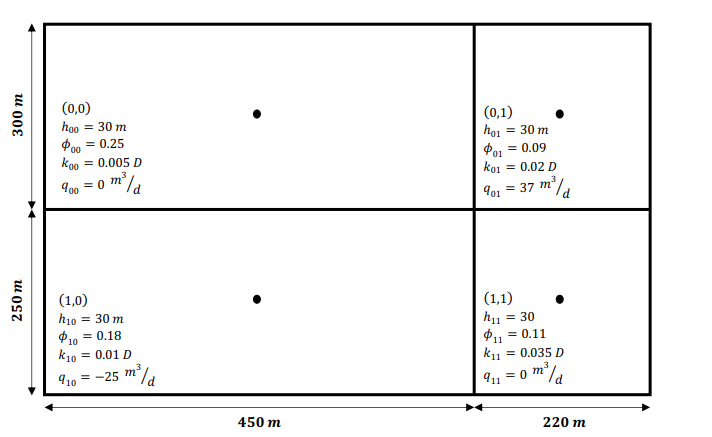

## Task 1

### Set up and write down the equations for explicit and implicit schemes in a general form. Also Write down equations for computing transmissibility in x and y directions in a general form.


### Explicit scheme in General Form

$$ T_{i+1/2,j}(P_{i+1,j}^n-P_{i,j}^n)-T_{i-1/2,j}(P_{i,j}^n-P_{i-1,j}^n)+T_{i,j+1/2}(P_{i,j+1}^n-P_{i,j}^n)-T_{i,j-1/2}(P_{i,j}^n-P_{i,j-1}^n)=\frac{c\phi_{i,j} V_{bi,j}}{\Delta t}(P_{i,j}^{n+1}-P_{i,j}^n)+\zeta_{i,j}, $$
where
$$ \zeta_{i,j}=T_{i+1/2,j}\rho g(D_{i+1,j}-D_{i,j})-T_{i-1/2,j}\rho g(D_{i,j}-D_{i-1,j})+
T_{i,j+1/2}\rho g(D_{i,j+1}-D_{i,j})-T_{i,j-1/2}\rho g(D_{i,j}-D_{i,j-1})- q_{i,j}^* $$

Equation for pressure:
$$ P_{i,j}^{n+1}=P_{i,j}^n+\frac{\Delta t}{c\phi_{i,j} V_{bi,j}}\left[T_{i+1/2,j}(P_{i+1,j}^n-P_{i,j}^n)-T_{i-1/2,j}(P_{i,j}^n-P_{i-1,j}^n)+T_{i,j+1/2}(P_{i,j+1}^n-P_{i,j}^n)-T_{i,j-1/2}(P_{i,j}^n-P_{i,j-1}^n)-\zeta_{i,j}\right], $$
$$ t_0 = 0, t_1 = \Delta t, t_2 = t_1 + \Delta t_2 \ldots  $$

### Implicit scheme in General Form

$$ T_{i+1/2,j}(P_{i+1,j}^{n+1}-P_{i,j}^{n+1})-T_{i-1/2,j}(P_{i,j}^{n+1}-P_{i-1,j}^{n+1})+T_{i,j+1/2}(P_{i,j+1}^{n+1}-P_{i,j}^{n+1})-T_{i,j-1/2}(P_{i,j}^{n+1}-P_{i,j-1}^{n+1})=\frac{c\phi_{i,j} V_{bi,j}}{\Delta t}(P_{i,j}^{{n+1}}-P_{i,j}^n)+\zeta_{i,j}, $$

Equation for pressure:
$$ P_{i,j}^n=P_{i,j}^{n+1}-\frac{\Delta t}{c\phi_{i,j} V_{bi,j}}\left[T_{i+1/2,j}(P_{i+1,j}^{n+1}-P_{i,j}^{n+1})-T_{i-1/2,j}(P_{i,j}^{n+1}-P_{i-1,j}^{n+1})+T_{i,j+1/2}(P_{i,j+1}^{n+1}-P_{i,j}^{n+1})-T_{i,j-1/2}(P_{i,j}^{n+1}-P_{i,j-1}^{n+1})-\zeta_{i,j}\right], $$

### Part b: Write down equations for computing transmissibility in x and y directions in a general form.

### X-direction

$$ T_{i+1/2,j} = \frac{2A_{i,j}k_{i,j}A_{i+1,j}k_{i+1,j}}{A_{i,j}k_{i,j}\Delta x_{i+1,j}+A_{i+1,j}k_{i+1,j}\Delta x_{i,j}}\frac{1}{\mu} $$


### Y-direction

$$ T_{i+1/2,j} = \frac{2A_{i,j}k_{i,j}A_{i,j+1}k_{i,j+1}}{A_{i,j}k_{i,j}\Delta y_{i,j+1}+A_{i,j+1}k_{i,j+1}\Delta y_{i,j}}\frac{1}{\mu} $$



## Task 2

### Write down the values for transmissibility in x and y directions in case of Neumann boundary conditions

Input variables are used to initiate the process as follows.

In [30]:
c = 1e-6 * 1e-3 # Pa-1 This is the compressibility of the fluid. Per pascal or psi is also known as "sip".
𝜇 = 2.5 * 1e-3 # Pas Fluid Viscosity. 2.5 mPa.s is equivalent to 2.5 cP in U.S field units.
Pr = 27 * 1e6 # Pa Initial reservoir pressure (3916 psi).
h = 30 # m 98 ft.

# Porosity for all Blocks 

φ00 = 0.25 # non-dimensional
φ10 = 0.18
φ11 = 0.11
φ01 = 0.09

# Permeability for all Blocks

k00 = 0.005 * 1e-12 # m2
k10 = 0.01 * 1e-12
k11 = 0.035 * 1e-12
k01 = 0.02 * 1e-12

# Flow rate for all Blocks

q00 = 0 # m3/sec
q10 = -25 / 86400
q11 = 0
q01 = 37 / 86400

# Dimension for all Blocks in the x-direction

dx00 = 450 # m
dx10 = 450
dx11 = 220
dx01 = 220

# Dimension for all Blocks in the y-direction

dy00 = 300 # m
dy10 = 250
dy11 = 250
dy01 = 300

Furthermore, the transmissibility is calculated as follows.

In [32]:
# The area (A) is a component of the transmissibility equation.

Ax00 = h * dx00
Ax01 = h * dx01
Ax10 = h * dx10
Ax11 = h * dx11

Ay00 = h * dy00
Ay01 = h * dy01
Ay10 = h * dy10
Ay11 = h * dy11

Tx00 = ((2 * Ay00 * k00 * Ay01 * k01) / (Ay00 * k00 * dx01 + Ay01 * k01 * dx00)) / 𝜇
Tx10 = ((2 * Ay10 * k10 * Ay11 * k11) / (Ay10 * k10 * dx11 + Ay11 * k11 * dx10)) / 𝜇

Ty10 = ((2 * Ax10 * k10 * Ax00 * k00) / (Ax10 * k10 * dy00 + Ax00 * k00 * dy10)) / 𝜇
Ty11 = ((2 * Ax11 * k11 * Ax01 * k01) / (Ax11 * k11 * dy01 + Ax01 * k01 * dy11)) / 𝜇

print("The Transmissibility of cell (0,0) in X direction is", Tx00)
print("The Transmissibility of cell (1,0) in X direction is", Tx10)
print("The Transmissibility of cell (1,0) in Y direction is", Ty10)
print("The Transmissibility of cell (1,1) in Y direction is", Ty11)

The Transmissibility of cell (0,0) in X direction is 7.128712871287129e-11
The Transmissibility of cell (1,0) in X direction is 1.16991643454039e-10
The Transmissibility of cell (1,0) in Y direction is 1.2705882352941177e-10
The Transmissibility of cell (1,1) in Y direction is 2.384516129032258e-10


### Part b: Difference Between Dirichlet and Neumann Boundary Conditions Using the Figure 1 (Reservoir Schematic) Shown Above

Basically, the grid-block has an advantage in the Neumann problem where Boundary Conditions specify the flow across the reservoir boundaries as in our case, discribed in Figure 1. This boundary condition is used if we want to describe flow rate across the boundary. However, the Dirichlet Boundary Condition is imposed when we use parameters like pressure (potential) or saturation at one of the boundaries or at the well.These time-dependent thermodynamic conditions are spatially distributed on the boundary.

This is making the huge differences between the results, since Dirichlet pressure is fixed pressure, and aquifer behaves as Neumann boundary condition with the changes in the time.

## Task 3

### Compute ∆t for Stability of the Explicit Scheme in Case of Neumann Boundary Condition.

$$ \Delta t \le \frac{c \phi_{i,j} V_{bi,j}}{T_{i+1/2,j}+T_{i-1/2,j}+T_{i,j+1/2}+T_{i,j-1/2}} $$

In [33]:
# Simplify implement the scheme as follows.

V00 = c * dx00 * dy00 * h * φ00 # m^3
V01 = c * dx01 * dy01 * h * φ01
V11 = c * dx11 * dy11 * h * φ11
V10 = c * dx10 * dy10 * h * φ10

In [34]:
t00 = V00 / (Tx00 + Ty10) / 24 / 3600
t01 = V01 / (Tx00 + Ty11) / 24 / 3600
t11 = V11 / (Tx10 + Ty11) / 24 / 3600
t10 = V10 / (Tx10 + Ty10) / 24 / 3600

print("∆t of cell (0,0) is", round(t00,4), "days")
print("∆t of cell (0,1) is", round(t01,4), "days")
print("∆t of cell (1,1) is", round(t11,4), "days")
print("∆t of cell (1,0) is", round(t10,4), "days")
print("The Minimum ∆t is", round(min(t00, t01, t11, t10),4), "days")

∆t of cell (0,0) is 59.0824 days
∆t of cell (0,1) is 6.6588 days
∆t of cell (1,1) is 5.9101 days
∆t of cell (1,0) is 28.8106 days
The Minimum ∆t is 5.9101 days


## Task 4

### Assuming Neumann Boundary Conditions, Implement Function that Calculates the Pressure Distribution Over Time for All Cells Using Explicit Scheme Until Time t = 250 days.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Choose two ∆t = 5 days and 15 days.


def pd_ex(step, time):
    
    Pr1 = Pr2 = Pr3 = Pr4 = Pr
    P1 = []
    P2 = []
    P3 = []
    P4 = []
    n_step = time // step 

    for i in range(n_step+1):
        
        P1.append(Pr1)
        P2.append(Pr2)
        P3.append(Pr3)
        P4.append(Pr4)
            
        Pt1 = Pr1 + (step * 24 * 3600 / V00) * (Tx00 * (Pr2 - Pr1) - Ty10 * (Pr1 - Pr3) + q00)
        Pt2 = Pr2 + (step * 24 * 3600 / V01) * (-Tx00 * (Pr2 - Pr1) - Ty11 * (Pr2 - Pr4) + q01)
        Pt3 = Pr3 + (step * 24 * 3600 / V10) * (Tx10 * (Pr4 - Pr3) + Ty10 * (Pr1 - Pr3) + q10)
        Pt4 = Pr4 + (step * 24 * 3600 / V11) * (-Tx10 * (Pr4 - Pr3) + Ty11 * (Pr2 - Pr4) + q11)
        
        Pr1 = Pt1
        Pr2 = Pt2
        Pr3 = Pt3
        Pr4 = Pt4
            
        Pf1 = np.array ([x / 1e6 for x in P1])
        Pf2 = np.array ([x / 1e6 for x in P2])
        Pf3 = np.array ([x / 1e6 for x in P3])
        Pf4 = np.array ([x / 1e6 for x in P4])

    return Pf1, Pf2, Pf3, Pf4

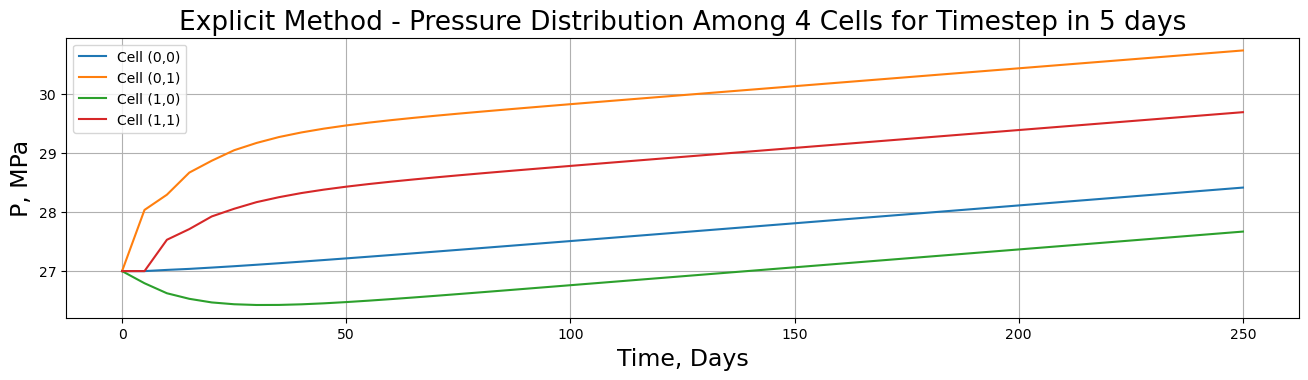

In [43]:
plt.figure(figsize = (35,8))
plt.subplot(221)
plt.title('Explicit Method - Pressure Distribution Among 4 Cells for Timestep in 5 days', fontsize = 19)
plt.plot(range(0,251,5), np.array(pd_ex(5,250)[0]), label = 'Cell (0,0)') 
plt.plot(range(0,251,5), np.array(pd_ex(5,250)[1]), label = 'Cell (0,1)')  
plt.plot(range(0,251,5), np.array(pd_ex(5,250)[2]), label = 'Cell (1,0)') 
plt.plot(range(0,251,5), np.array(pd_ex(5,250)[3]), label = 'Cell (1,1)') 
plt.xlabel('Time, Days', fontsize = 17)
plt.ylabel('P, MPa', fontsize = 17)
plt.legend()
plt.grid()

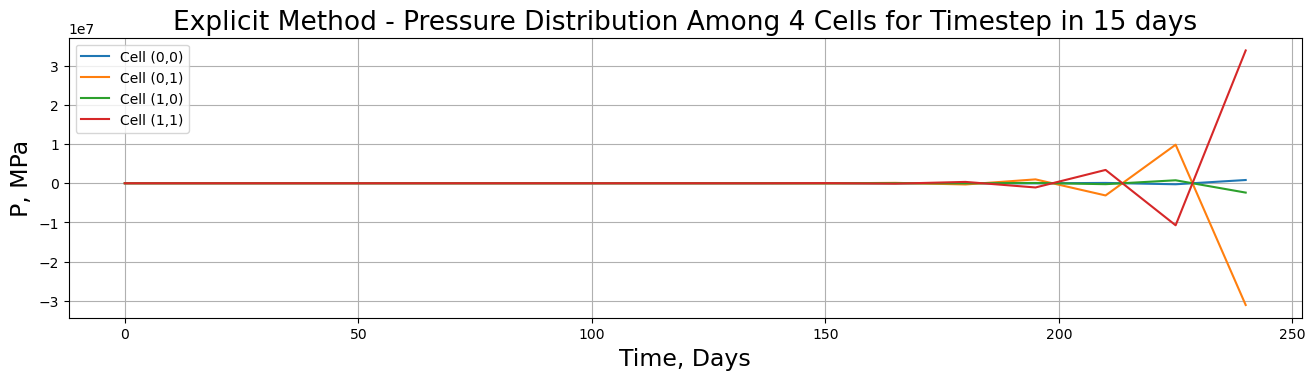

In [44]:
plt.figure(figsize = (35,8))
plt.subplot(221)
plt.title('Explicit Method - Pressure Distribution Among 4 Cells for Timestep in 15 days', fontsize = 19)
plt.plot(range(0,250,15), np.array(pd_ex(15,250)[0]), label = 'Cell (0,0)') 
plt.plot(range(0,250,15), np.array(pd_ex(15,250)[1]), label = 'Cell (0,1)')  
plt.plot(range(0,250,15), np.array(pd_ex(15,250)[2]), label = 'Cell (1,0)') 
plt.plot(range(0,250,15), np.array(pd_ex(15,250)[3]), label = 'Cell (1,1)') 
plt.xlabel('Time, Days', fontsize = 17)
plt.ylabel('P, MPa', fontsize = 17)
plt.legend()
plt.grid()

## Task 5

### Assuming Neumann Boundary Conditions, Calculate the Pressure Distribution Over Time for All Cells Using Implicit Scheme Until Time t = 250 days. Choose 5, 15 and 250 days timesteps.

In [49]:
def pd_im(step, time):

    P = np.array([[Pr], [Pr], [Pr], [Pr]])
    P1 = []
    P2 = []
    P3 = []
    P4 = []

    for i in range(0, time+1, step): 
        
        if i == 0:
            
            P1.append(Pr)
            P2.append(Pr)
            P3.append(Pr)
            P4.append(Pr)
            
        else:
            
            A = np.array([

                 [-Tx00 - Ty10 - (V00 * (1 / 24 / 3600)) / (i), Tx00, Ty10, 0],
                 [Tx00, - Ty11 - Tx00 - (V01 * (1 / 24 / 3600)) / (i), 0, Ty11],
                 [Ty10, 0, - Ty10 - Tx10 - (V10 * (1 / 24 /3600)) / (i), Tx10],
                 [0, Ty11, Tx10, - Ty11 - Tx10 - (V11 * (1 / 24 / 3600)) / (i)]
                
                ])

            b = np.array([

                 -(V00) / 24 / 3600 / i * P[0,0] - q00,
                 -(V01) / 24 / 3600 / i * P[1,0] - q01,
                 -(V10) / 24 / 3600 / i * P[2,0] - q10,
                 -(V11) / 24 / 3600 / i * P[3,0] - q11
                
                ])

            x = np.linalg.solve(A, b)

            P1.append(x[0])
            P2.append(x[1])
            P3.append(x[2])
            P4.append(x[3])
            
            Pf1 = [y / 1e6 for y in P1]
            Pf2 = [y / 1e6 for y in P2]
            Pf3 = [y / 1e6 for y in P3]
            Pf4 = [y / 1e6 for y in P4]

    return [Pf1, Pf2, Pf3, Pf4]

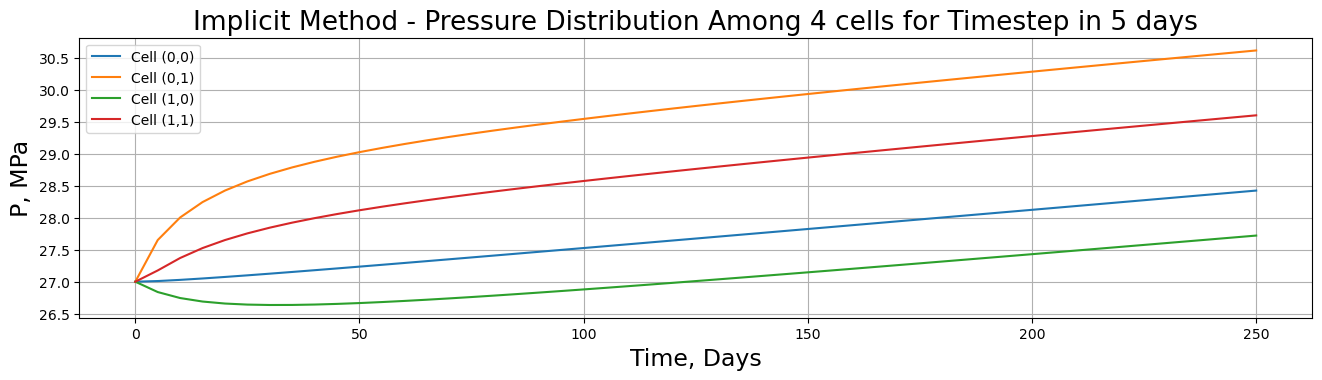

In [52]:
plt.figure(figsize = (35,8))
plt.subplot(221)
plt.title('Implicit Method - Pressure Distribution Among 4 cells for Timestep in 5 days', fontsize = 19)
plt.plot(range(0,251,5), np.array(pd_im(5,250)[0]), label = 'Cell (0,0)') 
plt.plot(range(0,251,5), np.array(pd_im(5,250)[1]), label = 'Cell (0,1)')  
plt.plot(range(0,251,5), np.array(pd_im(5,250)[2]), label = 'Cell (1,0)') 
plt.plot(range(0,251,5), np.array(pd_im(5,250)[3]), label = 'Cell (1,1)') 
plt.xlabel('Time, Days', fontsize = 17)
plt.ylabel('P, MPa', fontsize = 17)
plt.legend()
plt.grid()

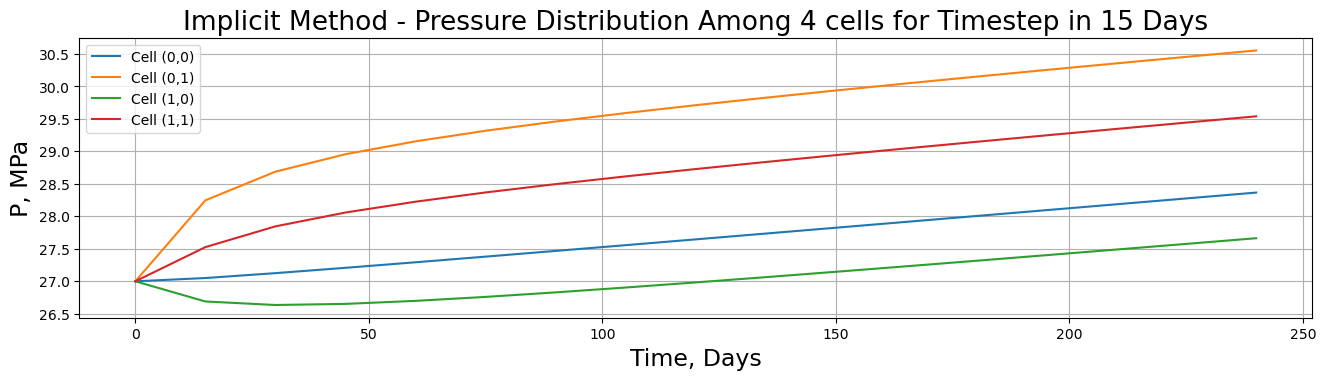

In [54]:
plt.figure(figsize = (35,8))
plt.subplot(221)
plt.title('Implicit Method - Pressure Distribution Among 4 cells for Timestep in 15 Days', fontsize = 19)
plt.plot(range(0,250,15), np.array(pd_im(15,250)[0]), label = 'Cell (0,0)') 
plt.plot(range(0,250,15), np.array(pd_im(15,250)[1]), label = 'Cell (0,1)')  
plt.plot(range(0,250,15), np.array(pd_im(15,250)[2]), label = 'Cell (1,0)') 
plt.plot(range(0,250,15), np.array(pd_im(15,250)[3]), label = 'Cell (1,1)') 
plt.xlabel('Time, Days', fontsize = 17)
plt.ylabel('P, MPa', fontsize = 17)
plt.legend()
plt.grid()

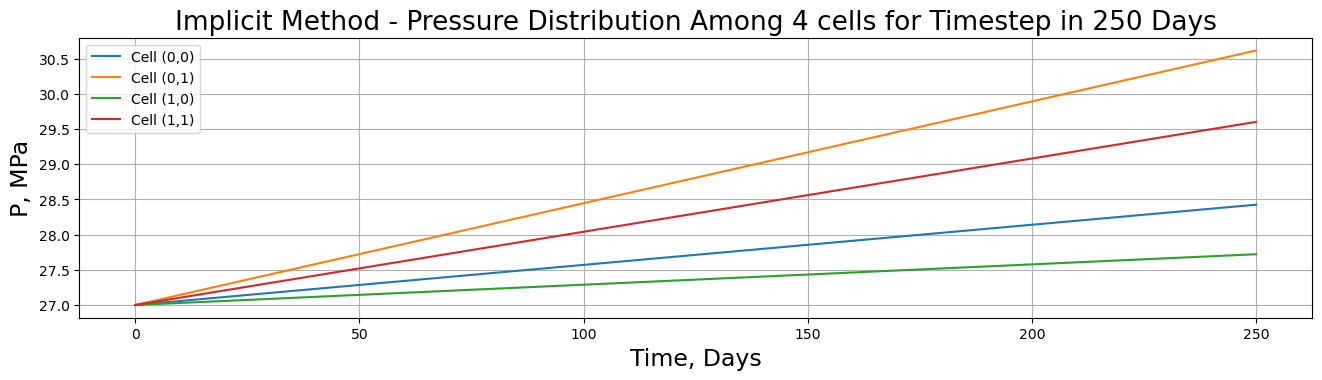

In [55]:
plt.figure(figsize = (35,8))
plt.subplot(221)
plt.title('Implicit Method - Pressure Distribution Among 4 cells for Timestep in 250 Days', fontsize = 19)
plt.plot(range(0,251,250), np.array(pd_im(250,250)[0]), label = 'Cell (0,0)') 
plt.plot(range(0,251,250), np.array(pd_im(250,250)[1]), label = 'Cell (0,1)')  
plt.plot(range(0,251,250), np.array(pd_im(250,250)[2]), label = 'Cell (1,0)') 
plt.plot(range(0,251,250), np.array(pd_im(250,250)[3]), label = 'Cell (1,1)') 
plt.xlabel('Time, Days', fontsize = 17)
plt.ylabel('P, MPa', fontsize = 17)
plt.legend()
plt.grid()

## Task 6

### Assuming Neumann Boundary Conditions Perform Material Balance Check in Each of the Above Cases and Comment on Stability of the Solution When Comparing the Explicit Versus Implicit Scheme

$$ MB = \frac{\sum\limits\frac{{c\phi_{i,j} V_{bi,j}}}{{\Delta t}}(P_{i,j}^{n+1}-P_{i,j}^n)}{\sum\limits\ q_{i,j}^*} $$

In [56]:
def MB(step, time, P):
        
    n_iter = time // step
    
    bal = np.zeros(n_iter)
    
    for i in range(n_iter):
        
        s1 = (10 ** 6) * (V00 / step / 24 / 3600 * (P[0][i+1]-P[0][i]) + V01 / step / 24 / 3600 * (P[1][i+1]-P[1][i]) + V10 / step / 24 / 3600 * (P[2][i+1]-P[2][i]) + V11 / step / 24 / 3600 * (P[3][i+1]-P[3][i]))  
        
        s2 = np.sum([q00,q01,q10,q11])
        
        bal[i] = s1 / s2
    eps = 10**-10
    if (bal - 1 < eps).all():
        print('Material Balance Check Succeeded')
    else:
        print('Material Balance Check Failed')

In [57]:
MB(5, 250, pd_ex(5, 250))

Material Balance Check Succeeded


In [58]:
MB(15, 250, pd_ex(15, 250))

Material Balance Check Failed


In [59]:
MB(5, 250, pd_im(5, 250))

Material Balance Check Succeeded


In [60]:
MB(15, 250, pd_im(15, 250))

Material Balance Check Succeeded


In [61]:
MB(250, 250, pd_ex(250, 250))

Material Balance Check Succeeded


In conclusion, the Explicit Scheme is "conditionally stable".

In case the time exceeded  the time limit, the material balance check conducted using the Explicit Scheme would have failed as it was shown in the second calculation where timestep is almost twice bigger than limit of time. Implicit Scheme should be considered for more reliable solutions.

## References

1. Lecture Notes.
2. Lecture Seminar by Alexey Olkhovikov (Made adjustments to the code where necessary)
3. Basic Applied Reservoir Simulation by Turgar Ertekin, Jamal H. Abou-Kassem and Gregory R. King
4. YouTube Videos (https://www.youtube.com/watch?v=bdngnIRUZ_0&pp=ygUecmVzZXJ2b2lyIHNpbXVsYXRpb24gaW4gcHl0aG9u)